# Major Leagues

Data Regression - Project 4

Soccer scores

Data Source: https://github.com/fivethirtyeight/data/tree/master/soccer-spi

The data are contained in the files spi_matches.csv

This notebook is a regression data analysis on scores for the soccer datasets. Exploratory data analysis is also performed on the data set to produce interesting results.

Reference https://www.kaggle.com/pavanraj159/european-football-data-analysis/notebook
          https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

## Importing Library and Datasets

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#### Import Data

In [2]:
data = pd.read_csv("/data/spi_matches.csv")    #use your own path for the data set
data.head(10)

date  league_id                   league            team1  \
0  2016-08-12       1843           French Ligue 1           Bastia   
1  2016-08-12       1843           French Ligue 1        AS Monaco   
2  2016-08-13       2411  Barclays Premier League        Hull City   
3  2016-08-13       2411  Barclays Premier League          Burnley   
4  2016-08-13       2411  Barclays Premier League    Middlesbrough   
5  2016-08-13       2411  Barclays Premier League      Southampton   
6  2016-08-13       2411  Barclays Premier League          Everton   
7  2016-08-13       2411  Barclays Premier League   Crystal Palace   
8  2016-08-13       1843           French Ligue 1         Bordeaux   
9  2016-08-13       2411  Barclays Premier League  Manchester City   

                  team2   spi1   spi2   prob1   prob2  probtie     ...      \
0   Paris Saint-Germain  51.16  85.68  0.0463  0.8380   0.1157     ...       
1              Guingamp  68.85  56.48  0.5714  0.1669   0.2617     ...       
2        Leicester City  53.57  66.81  0.3459  0.3621   0.2921     ...       
3          Swansea City  58.98  59.74  0.4482  0.2663   0.2854     ...       
4            Stoke City  56.32  60.35  0.4380  0.2692   0.2927     ...       
5               Watford  69.49  59.33  0.5759  0.1874   0.2367     ...       
6     Tottenham Hotspur  68.02  73.25  0.3910  0.3401   0.2689     ...       
7  West Bromwich Albion  55.19  58.66  0.4214  0.2939   0.2847     ...       
8            St Etienne  62.01  64.92  0.4232  0.2764   0.3004     ...       
9            Sunderland  86.42  53.64  0.8152  0.0525   0.1323     ...       

   importance1  importance2  score1  score2   xg1   xg2  nsxg1  nsxg2  \
0         32.4         67.7     0.0     1.0  0.97  0.63   0.43   0.45   
1         53.7         22.9     2.0     2.0  2.45  0.77   1.75   0.42   
2         38.1         22.2     2.0     1.0  0.85  2.77   0.17   1.25   
3         36.5         29.1     0.0     1.0  1.24  1.84   1.71   1.56   
4         33.9         32.5     1.0     1.0  1.40  0.55   1.13   1.06   
5         34.1         30.7     1.0     1.0  1.05  0.22   1.52   0.41   
6         31.9         48.0     1.0     1.0  0.73  1.11   0.88   1.81   
7         43.6         34.6     0.0     1.0  1.11  0.68   0.84   1.60   
8         37.9         44.2     3.0     2.0  1.03  1.84   1.10   2.26   
9         73.0         27.0     2.0     1.0  2.14  1.25   1.81   0.92   

   adj_score1  adj_score2  
0        0.00        1.05  
1        2.10        2.10  
2        2.10        1.05  
3        0.00        1.05  
4        1.05        1.05  
5        1.05        1.05  
6        1.05        1.05  
7        0.00        1.05  
8        3.12        2.10  
9        2.10        1.05  

[10 rows x 22 columns]

In [3]:
#chech null values
data.isnull().sum()

date               0
league_id          0
league             0
team1              0
team2              0
spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
importance1    10327
importance2    10327
score1          6496
score2          6496
xg1            12203
xg2            12203
nsxg1          12203
nsxg2          12203
adj_score1     12203
adj_score2     12203
dtype: int64

In [4]:
#as this is a big dataset we can drop Null Values 
data.dropna(inplace=True)
data.isnull().sum()

date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

## Exploratory Data Analysis Begins

#### Matches by League

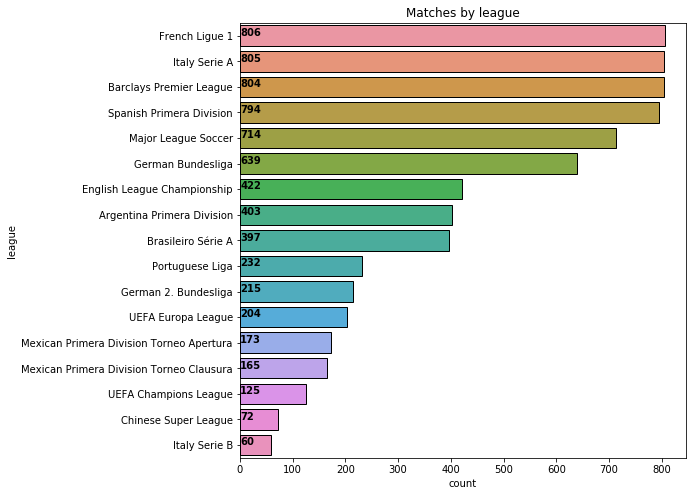

In [5]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

#### Home and away goals by league

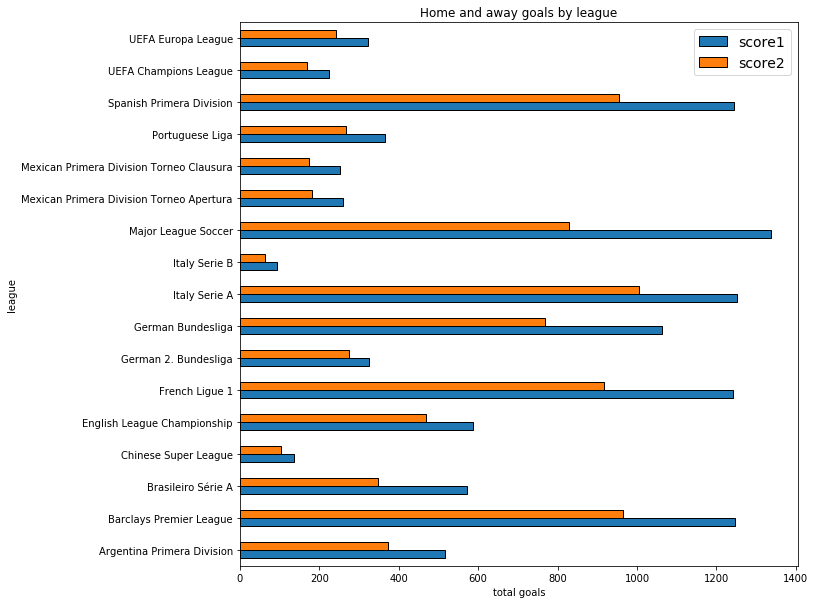

In [6]:
data.groupby("league").agg({"score1":"sum","score2":"sum"}).plot(kind="barh",
                                                            figsize = (10,10),
                                                            edgecolor = "k",
                                                            linewidth =1 )
plt.title("Home and away goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

#### TOP TEAMS BY THEIR HOME & AWAY GOALS

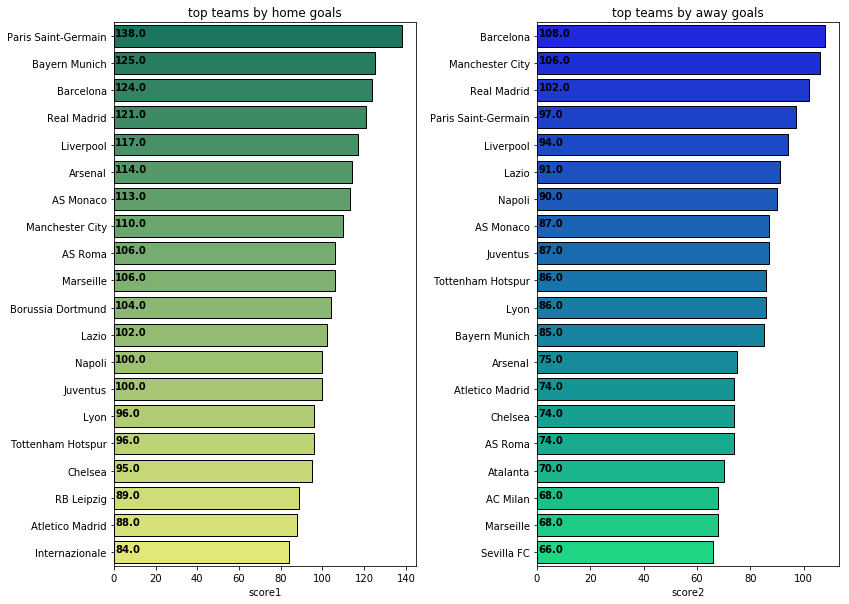

In [7]:
h_t = data.groupby("team1")["score1"].sum().reset_index()
a_t = data.groupby("team2")["score2"].sum().reset_index()
h_t = h_t.sort_values(by="score1",ascending= False)
a_t = a_t.sort_values(by="score2",ascending= False)
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="team1",x="score1",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["score1"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="team2",x="score2",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["score2"][:20]):
    ax.text(.7,i,j,weight = "bold")

#### Teams with highest total goals

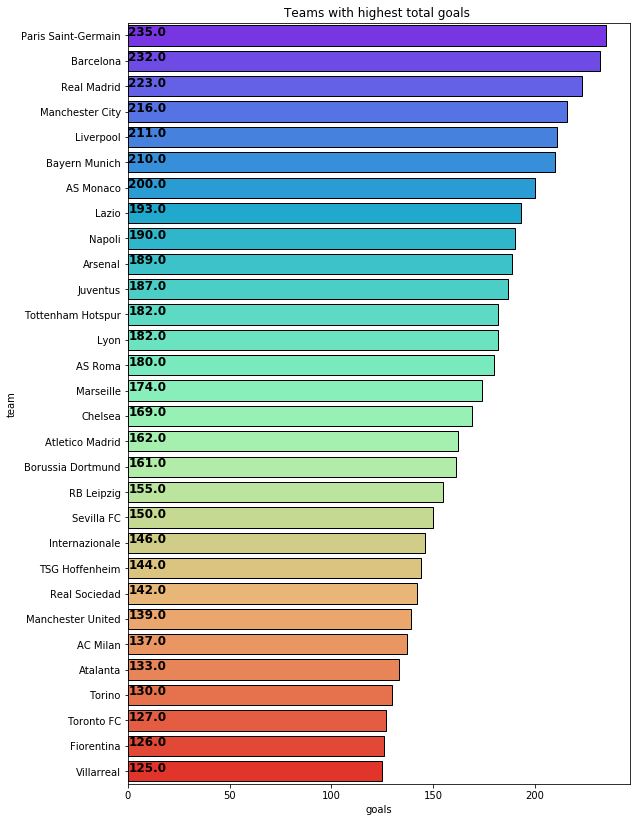

In [8]:
x = h_t
x = x.rename(columns={'team1':"team", 'score1':"goals"})
y = a_t
y = y.rename(columns={'team2':"team", 'score2':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()

## Feature Engineering begins

In [9]:
data.dtypes

date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [10]:
#subsetting data to fit our regression model later
data = data.drop(columns=["date", "league_id"])

In [11]:
#changing "league", "team1", "team2" to category
data["league"] = data["league"].astype('category')
data["team1"] = data["team1"].astype('category')
data["team2"] = data["team2"].astype('category')

data.dtypes

league         category
team1          category
team2          category
spi1            float64
spi2            float64
prob1           float64
prob2           float64
probtie         float64
proj_score1     float64
proj_score2     float64
importance1     float64
importance2     float64
score1          float64
score2          float64
xg1             float64
xg2             float64
nsxg1           float64
nsxg2           float64
adj_score1      float64
adj_score2      float64
dtype: object

In [12]:
#Label Encoding
data["league"] = data["league"].cat.codes
data["team1"] = data["team1"].cat.codes
data["team2"] = data["team2"].cat.codes

## Regression Analysis begins

#### Linear Regression in SKLearn

In [13]:
#Train the model
X = data.drop(columns=['score1','score2'])
y1 = data.score1
y2 = data.score2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=1)

In [14]:
#fit the model for score1 score2
modelScore1 = linear_model.LinearRegression()
modelScore2 = linear_model.LinearRegression()

modelScore1.fit(X1_train, y1_train)
modelScore2.fit(X1_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#Making predictions for Score 1
Score1Predict_train = modelScore1.predict(X1_train)
Score1Predict_test = modelScore1.predict(X1_test)
print("Predictions for Score1 train : ", Score1Predict_train)

Predictions for Score1 train :  [ 1.07313758  2.10100977 -0.03479454 ...  3.68279852  3.01202928
  1.07167619]


In [16]:
print("Predictions for Score1 test : ", Score1Predict_test)

Predictions for Score1 test :  [0.99294361 2.05214803 0.99231002 ... 1.0968314  0.07842737 0.01378555]


In [17]:
#Making predictions for Score 2
Score2Predict_train = modelScore2.predict(X2_train)
Score2Predict_test = modelScore2.predict(X2_test)
print("Predictions for Score1 train : ", Score1Predict_train)

Predictions for Score1 train :  [ 1.07313758  2.10100977 -0.03479454 ...  3.68279852  3.01202928
  1.07167619]


In [18]:
print("Predictions for Score1 test : ", Score2Predict_test)

Predictions for Score1 test :  [ 2.14818837  1.02105686  1.03574122 ... -0.02441434  0.01513625
  0.03182482]


In [19]:
#Print Linear Regression Mean Square Error for Score 1
MSE_Score1_train = round(np.mean(np.subtract(y1_train.values, Score1Predict_train) ** 2),3)
print("Mean Square Error for Score 1 train : ", MSE_Score1_train)
MSE_Score1_test = round(np.mean(np.subtract(y1_test.values, Score1Predict_test) ** 2),3)
print("Mean Square Error for Score 1 test : ", MSE_Score1_test)

print()

#Print Linear Regression Mean Square Error for Score 2
MSE_Score2_train = round(np.mean(np.subtract(y2_train.values, Score2Predict_train) ** 2),3)
print("Mean Square Error for Score 2 train : ", MSE_Score2_train)
MSE_Score2_test = round(np.mean(np.subtract(y2_test.values, Score2Predict_test) ** 2),3)
print("Mean Square Error for Score 2 test : ", MSE_Score2_test)

Mean Square Error for Score 1 train :  0.031
Mean Square Error for Score 1 test :  0.025

Mean Square Error for Score 2 train :  0.016
Mean Square Error for Score 2 test :  0.019


In [20]:
#Print Coeffecients of score1
print('Coefficients of score1: \n', modelScore1.coef_)

print()

#Print Coeffecients of score2
print('Coefficients of score2: \n', modelScore2.coef_)

Coefficients of score1: 
 [-4.90826772e-04 -1.15447798e-05  1.74426966e-05  4.92738996e-04
 -8.85570221e-04 -7.53093200e+01 -7.50874221e+01 -7.54921391e+01
  1.53711852e-03 -1.64098094e-02 -1.87488085e-04  3.80427039e-05
  3.81388864e-02  1.70585052e-03  2.07297052e-03 -2.56682873e-02
  1.00611054e+00 -3.23804199e-02]

Coefficients of score2: 
 [ 1.72988339e-04  2.29169012e-06 -2.35847334e-05  5.16056386e-04
 -4.19577840e-04 -1.13575632e+01 -1.12907054e+01 -1.15806159e+01
 -1.03294592e-02 -1.61310065e-02  1.76641551e-05 -1.17689508e-04
 -1.00007157e-03  3.02015744e-02 -8.00714575e-03 -5.98121691e-03
 -1.95294477e-02  9.94272015e-01]


In [21]:
#Print Intercept of score1
print('Intercept of score1 : \n',modelScore1.intercept_)

print()

#Print Intercept of score2
print('Intercept of score2 : \n',modelScore2.intercept_)

Intercept of score1 : 
 75.33405926088085

Intercept of score2 : 
 11.43794008831915


Text(0.5,1,'Residual Plot for Score1 - Train:Blue and Test:Red')

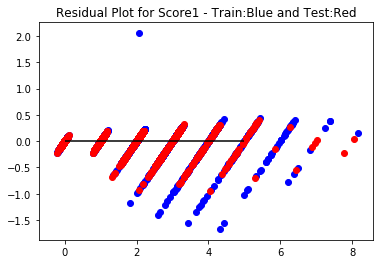

In [22]:
#Residual plot for score1
plt.scatter(Score1Predict_train,np.subtract(Score1Predict_train,y1_train.values),c='b')
plt.scatter(Score1Predict_test,np.subtract(Score1Predict_test,y1_test.values),c='r')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Score1 - Train:Blue and Test:Red')

Text(0.5,1,'Residual Plot for Score2 - Train:Blue and Test:Red')

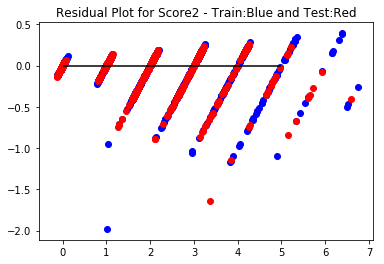

In [23]:
#Residual plot for score2
plt.scatter(Score2Predict_train,np.subtract(Score2Predict_train,y2_train.values),c='b')
plt.scatter(Score2Predict_test,np.subtract(Score2Predict_test,y2_test.values),c='r')
plt.hlines(y=0,xmin=0,xmax=5)

plt.title('Residual Plot for Score2 - Train:Blue and Test:Red')